Завдання 1: Перші 5 рядків набору даних:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Завдання 2: Перевірка наявності пропусків:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Завдання 3: Кількість дублікатів: 0

Завдання 5: Типи даних:
age  

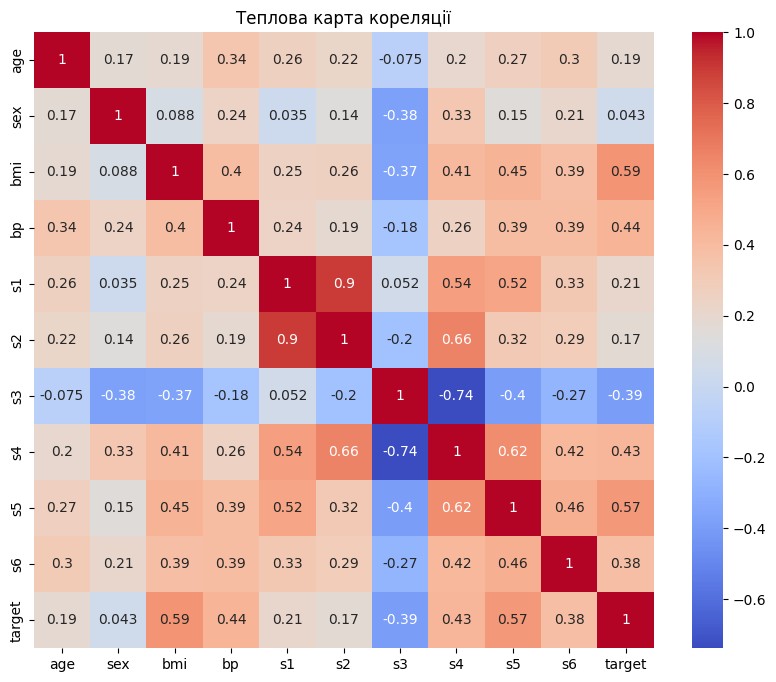


Завдання 7: Перевірка наявності пропусків після заповнення:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
Завдання 7: Константні ознаки: []

Завдання 10: Лінійна регресія: R² = 0.4526027629719196, MSE = 2900.193628493481
Завдання 10: RandomForest регресія: R² = 0.44074575666493343, MSE = 2963.013847191012


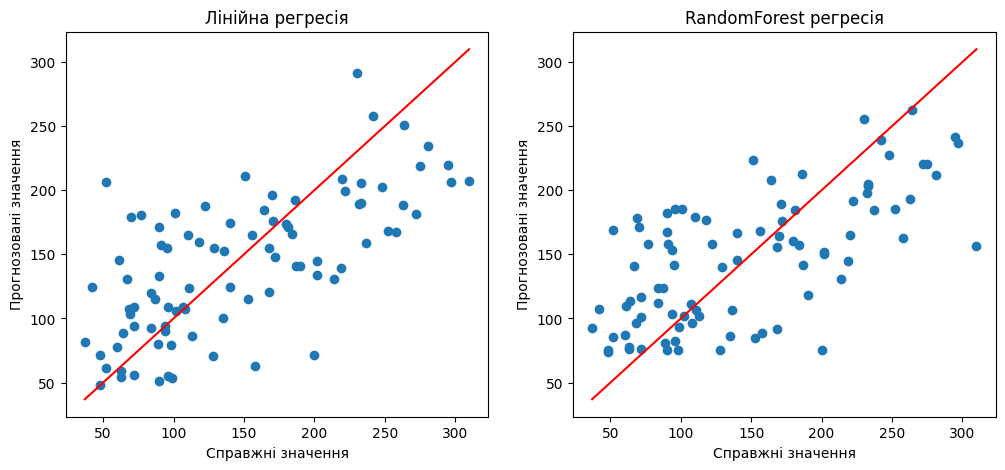


Завдання 12: Справжні і прогнозовані значення:
     Справжні значення  Лінійна регресія  RandomForest
287              219.0        139.547558        144.66
211               70.0        179.517208        171.05
72               202.0        134.038756        150.62
321              230.0        291.417029        255.36
73               111.0        123.789659        106.39


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Завантаження набору даних Diabetes
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# 1. Вивести перших 5 рядків
print("Завдання 1: Перші 5 рядків набору даних:")
print(df.head())

# 2. Перевірити наявність пропусків
print("\nЗавдання 2: Перевірка наявності пропусків:")
print(df.isnull().sum())

# Замінити пропущені значення на середнє значення
df.fillna(df.mean(), inplace=True)

# 3. Перевірити наявність дублікатів
duplicates = df.duplicated().sum()
print(f"\nЗавдання 3: Кількість дублікатів: {duplicates}")

# Видалити дублікати, якщо є
if duplicates > 0:
    df.drop_duplicates(inplace=True)

# 4. Замінити бінарні ознаки
# У наборі даних немає стовпця 'sex', але якщо б він був, то його можна було б обробити так:
# print("\nЗавдання 4: Унікальні значення в стовпці 'sex':")
# print(df['sex'].unique())
# df['sex'] = df['sex'].map({'female': 0, 'male': 1})

# 5. Перевірити тип даних
print("\nЗавдання 5: Типи даних:")
print(df.dtypes)

# Перетворення даних в числовий формат (якщо необхідно)
# df = df.apply(pd.to_numeric, errors='coerce')

# 6. Обчислити кореляцію між прогресом діабету і іншими ознаками
correlation = df.corr()

# Кореляція з цільовою змінною
target_corr = correlation['target'].sort_values(ascending=False)
print("\nЗавдання 6: Кореляція з цільовою змінною:")
print(target_corr)

# Побудувати теплову карту кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Теплова карта кореляції')
plt.show()

# 7. Масштабувати ознаки
# Перевірка наявності пропусків перед масштабуванням
print("\nЗавдання 7: Перевірка наявності пропусків після заповнення:")
print(df.isnull().sum())

# Перевірка на константні ознаки (з нульовою дисперсією)
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Завдання 7: Константні ознаки:", constant_features)

# Видалити константні ознаки
df.drop(columns=constant_features, inplace=True)

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

# Перетворення назад у DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=df.columns[:-1])
df_scaled['target'] = df['target']

# 8. Поділити дані на тренувальну і тестову вибірки
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Побудувати модель лінійної регресії і RandomForest регресії
# Лінійна регресія
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# RandomForest регресія
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 10. Вивести коефіцієнт детермінації і середньоквадратичну помилку
# Прогнозування
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Оцінка моделей
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"\nЗавдання 10: Лінійна регресія: R² = {r2_linear}, MSE = {mse_linear}")
print(f"Завдання 10: RandomForest регресія: R² = {r2_rf}, MSE = {mse_rf}")

# 11. Побудувати графіки
plt.figure(figsize=(12, 5))

# Графік для лінійної регресії
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Лінійна регресія')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

# Графік для RandomForest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('RandomForest регресія')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

plt.show()

# 12. Вивести справжні і прогнозовані значення
results = pd.DataFrame({'Справжні значення': y_test,
                        'Лінійна регресія': y_pred_linear,
                        'RandomForest': y_pred_rf})
print("\nЗавдання 12: Справжні і прогнозовані значення:")
print(results.head())
